<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/lecroyparser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lecroyparser

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
import lecroyparser

# mount my drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


0 C1--2021_4_8_GEM2--00000.trc
Le Croy Scope Data
Path: None - from bytes data
Endianness: <
Instrument: LECROYWS4104HD
Instrument Number: 18165
Template Name: LECROY_2_3
Channel: Channel 1
WaveArrayCount: 250002
Vertical Coupling: DC1M
Bandwidth Limit: on
Record Type: single_sweep
Processing: No Processing
TimeBase: 50 us/div
TriggerTime: 2021-04-08 19:55:42.53



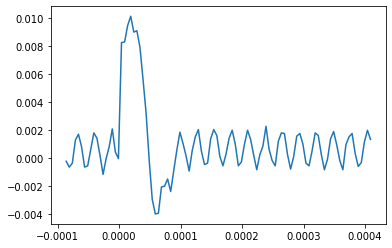

In [3]:
#
# data path /content/drive/MyDrive/ aggiungere la directory personale dove sono i dati
#
datapath = 'tmp/dati/' # direttory sul mio drive dove sono i dati
path='/content/drive/MyDrive/'+datapath
files = os.listdir(path)
usamle = 100 # -1 read all https://pypi.org/project/lecroyparser/

for i, filename in enumerate(files):
  print(i, filename)
  f = open(path+filename, 'rb')
  data = lecroyparser.ScopeData(data = f.read(), sparse = usamle)
  plt.plot(data.x, data.y)
  print (data)
  f.close()
  break # togleire se si vuole luppare su tutti eventi.
plt.show()

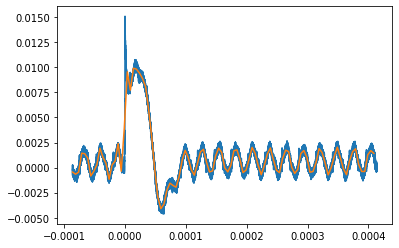

In [4]:
#
# altrenativa dopo con differente undersampling scypy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html
#
from scipy import signal
data = lecroyparser.ScopeData(path+filename)
plt.plot(data.x, data.y)
data_rs = signal.resample(data.y, usamle, data.x)
plt.plot(data_rs[1], data_rs[0])
plt.show()

In [5]:
str(data)[str(data).find('TimeBase:'):str(data).find('\nTriggerTime:')]

'TimeBase: 50 us/div'

In [15]:
# metadata
# variable https://github.com/jneer/lecroy-reader/blob/master/lecroyreader/lecroy.py (mettere le maiscole al posto delle _...)
# 
print(data.verticalGain, data.timeBase, data.horizOffset, data.verticalOffset)

2.9411e-06 50 us/div -8.600036599999996e-05 -0.019


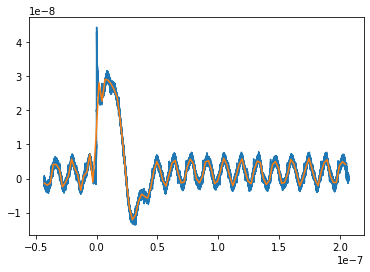

In [20]:
a = data.y *  data.verticalGain
t = data.x *  float(data.timeBase.split(' ')[0]) * 10e-6 # da mettere a posto con varie scale
plt.plot(t, a)
data_rs = signal.resample(a, usamle, t)
plt.plot(data_rs[1], data_rs[0])
plt.show()